I want to recreate the plot given me by Vanessa on the introduction page for my master thesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the GOFC data more efficiently
GFOC_dir = "/home/dschwarz/Documents/MT/Dataset/Dataset_MSc/GFOC_RDCDFI.csv"
GFOC_data = pd.read_csv(GFOC_dir, low_memory=True)

Download Catalogues

In [2]:
import pandas as pd

# import the data
Shock = pd.read_csv('/home/dschwarz/Documents/MT/Dataset/Dataset_IPshocks/shocks_GFOC.csv')
Helio = pd.read_csv('/home/dschwarz/Documents/MT/Dataset/Dataset_ICMECAT/helio4cast_icmecat_GFOC.csv')
RC = pd.read_csv('/home/dschwarz/Documents/MT/Dataset/Dataset_ICMECAT/RC_icmecat_GFOC.csv')


Select relevant features

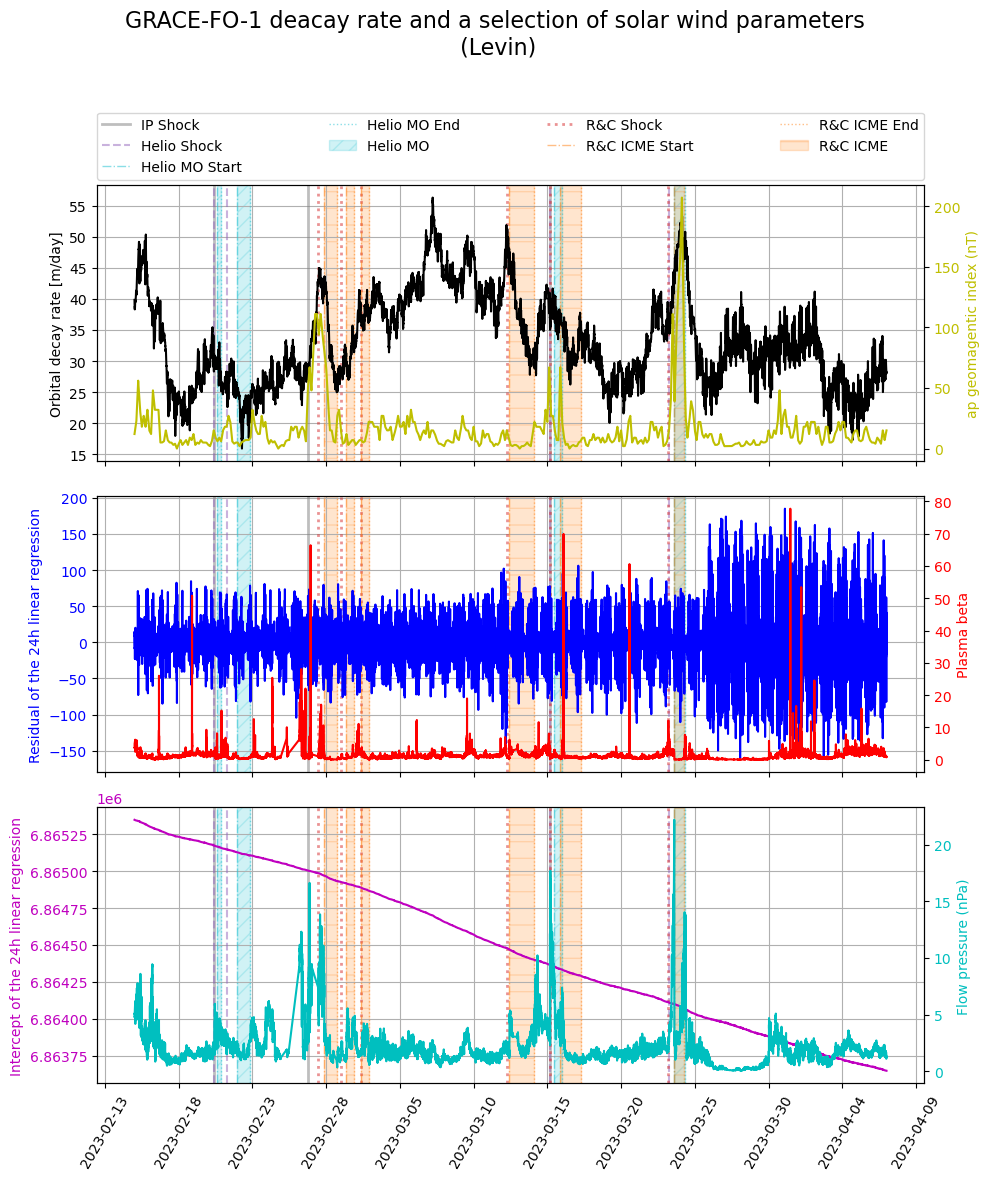

In [3]:
import matplotlib.dates as mdates
import numpy as np

# =========================== Input ===================================
start_date = '2023-02-15 00:00:00'
end_date = '2023-04-07 00:00:00'

# Add an option for monthly, daily, or hourly ticks
tick_interval = 'daily'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 5  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)

# =====================================================================

start = GFOC_data[GFOC_data['time'] == start_date].index[0]
end = GFOC_data[GFOC_data['time'] == end_date].index[0]
# Time conversion
GFOC_time = GFOC_data['time'][start:end]
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

# # only data times that is in the range of the GFOC data
Shock_GFOC = Shock[pd.to_datetime(Shock['Time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
Shock_GFOC = Shock_GFOC[pd.to_datetime(Shock_GFOC['Time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
Helio_GFOC = Helio[pd.to_datetime(Helio['mo_end_time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
Helio_GFOC = Helio_GFOC[pd.to_datetime(Helio_GFOC['icme_start_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
RC_GFOC = RC[pd.to_datetime(RC['ICME_End'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
RC_GFOC = RC_GFOC[pd.to_datetime(RC_GFOC['Disturbance_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]

# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))                         
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)

# flags

Shock_flag_GFOC = pd.to_datetime(Shock_GFOC['Time'])
Helios_shock_flag_GFOC = pd.to_datetime(Helio_GFOC['icme_start_time'])
Helios_mostart_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_start_time'])
Helios_moend_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_end_time'])
RC_shock_flag_GFOC = pd.to_datetime(RC_GFOC['Disturbance_time'])
RC_start_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_Start'])
RC_end_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_End'])


# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex =True)

# flags
for ax in axs:
    # IP Shock flags
    for t in Shock_flag_GFOC:
        ax.axvline(t, color='tab:gray', alpha=0.5, linestyle='-', linewidth=2, label='IP Shock')
    
    # Helio Shock flags
    for t in Helios_shock_flag_GFOC:
        ax.axvline(t, color='tab:purple', alpha=0.5, linestyle='--', linewidth=1.5, label='Helio Shock')

    # Helios MO flags
    for tstart, tend in zip(Helios_mostart_flag_GFOC, Helios_moend_flag_GFOC):
        ax.axvline(tstart, color='tab:cyan', alpha=0.5, linestyle='-.', linewidth=1.0, label='Helio MO Start')
        ax.axvline(tend, color='tab:cyan', alpha=0.5, linestyle=':', linewidth=1.0, label='Helio MO End')
        ax.axvspan(tstart, tend, color='tab:cyan', alpha=0.2, hatch = '//', label='Helio MO')
    
    # RC Shock flags
    for t in RC_shock_flag_GFOC:
        ax.axvline(t, color='tab:red', alpha=0.5, linestyle=':', linewidth=2.0, label='R&C Shock')

    # RC flags
    for tstart, tend in zip(RC_start_flag_GFOC, RC_end_flag_GFOC):
        ax.axvline(tstart, color='tab:orange', alpha=0.5, linestyle='-.', linewidth=1.0, label='R&C ICME Start')
        ax.axvline(tend, color='tab:orange', alpha=0.5, linestyle=':', linewidth=1.0, label='R&C ICME End')
        ax.axvspan(tstart, tend, color='tab:orange', alpha=0.2, hatch = '-', label='R&C ICME')


handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
              ncols=4, mode="expand", borderaxespad=0.)

# first figure
axs[0].plot(GFOC_time, GFOC_data['orbital_decay'][start:end], 'k')
axs[0].set_ylabel('Orbital decay rate [m/day]', color = 'k')
axs[0].grid()
axs[0].tick_params(axis='y', labelcolor='k')
ax1 = axs[0].twinx()
ax1.plot(GFOC_time, GFOC_data['ap (LASP)'][start:end], 'y')
ax1.set_ylabel('ap geomagentic index (nT)', color='y')
ax1.tick_params(axis='y', labelcolor='y')

# second figure
axs[1].plot(GFOC_time, GFOC_data['res'][start:end], 'b')
axs[1].set_ylabel('Residual of the 24h linear regression', color = 'b')
axs[1].grid()
axs[1].tick_params(axis='y', labelcolor='b')
ax2 = axs[1].twinx()
ax2.plot(GFOC_time, GFOC_data['Plasma beta'][start:end], 'r')
ax2.set_ylabel('Plasma beta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# third figures
axs[2].plot(GFOC_time, GFOC_data['intercept'][start:end], 'm')
axs[2].set_ylabel('Intercept of the 24h linear regression', color='m')
axs[2].grid()
axs[2].tick_params(axis='y', labelcolor='m')
format_ticks(axs[2], tick_interval, tick_step)
ax2 = axs[2].twinx()
ax2.plot(GFOC_time, GFOC_data['Flow pressure (nPa)'][start:end], 'c')
ax2.set_ylabel('Flow pressure (nPa)', color='c')
ax2.tick_params(axis='y', labelcolor='c')

# Set the figure title
fig.suptitle('GRACE-FO-1 deacay rate and a selection of solar wind parameters\n (Levin)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

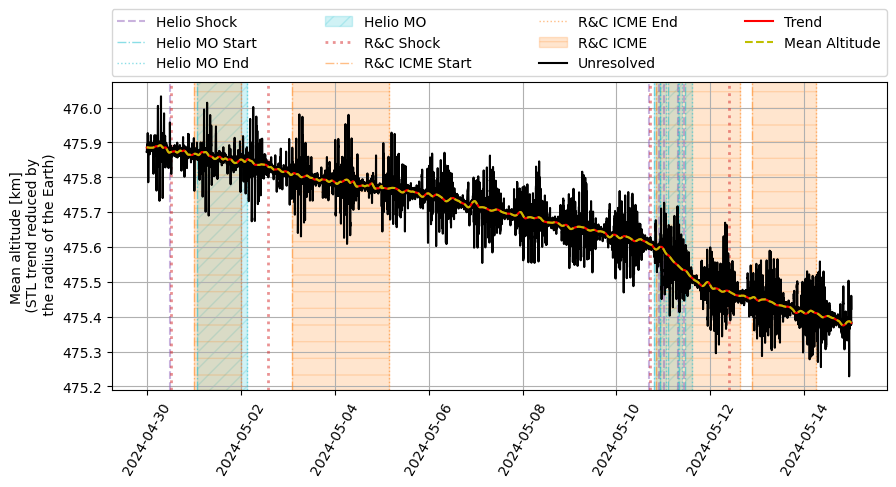

In [4]:
import matplotlib.dates as mdates

# =========================== Input ===================================
start_date = '2024-04-30 00:00:00'
end_date = '2024-05-15 00:00:00'

# Add an option for monthly, daily, or hourly ticks
tick_interval = 'daily'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 2  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)

# =====================================================================

start = GFOC_data[GFOC_data['time'] == start_date].index[0]
end = GFOC_data[GFOC_data['time'] == end_date].index[0]
# Time conversion
GFOC_time = GFOC_data['time'][start:end]
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

# only data times that is in the range of the GFOC data
Shock_GFOC = Shock[pd.to_datetime(Shock['Time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
Shock_GFOC = Shock_GFOC[pd.to_datetime(Shock_GFOC['Time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
Helio_GFOC = Helio[pd.to_datetime(Helio['mo_end_time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
Helio_GFOC = Helio_GFOC[pd.to_datetime(Helio_GFOC['icme_start_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
RC_GFOC = RC[pd.to_datetime(RC['ICME_End'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
RC_GFOC = RC_GFOC[pd.to_datetime(RC_GFOC['Disturbance_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]

# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))                         
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)

# flags

Shock_flag_GFOC = pd.to_datetime(Shock_GFOC['Time'])
Helios_shock_flag_GFOC = pd.to_datetime(Helio_GFOC['icme_start_time'])
Helios_mostart_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_start_time'])
Helios_moend_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_end_time'])
RC_shock_flag_GFOC = pd.to_datetime(RC_GFOC['Disturbance_time'])
RC_start_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_Start'])
RC_end_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_End'])


# Create a figure with three subplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))

# flags
for t in Shock_flag_GFOC:
    ax1.axvline(t, color='tab:gray', alpha=0.5, linestyle='-', linewidth=2, label='IP Shock')
    
# Helio Shock flags
for t in Helios_shock_flag_GFOC:
    ax1.axvline(t, color='tab:purple', alpha=0.5, linestyle='--', linewidth=1.5, label='Helio Shock')

# Helios MO flags
for tstart, tend in zip(Helios_mostart_flag_GFOC, Helios_moend_flag_GFOC):
    ax1.axvline(tstart, color='tab:cyan', alpha=0.5, linestyle='-.', linewidth=1.0, label='Helio MO Start')
    ax1.axvline(tend, color='tab:cyan', alpha=0.5, linestyle=':', linewidth=1.0, label='Helio MO End')
    ax1.axvspan(tstart, tend, color='tab:cyan', alpha=0.2, hatch = '//', label='Helio MO')

# RC Shock flags
for t in RC_shock_flag_GFOC:
    ax1.axvline(t, color='tab:red', alpha=0.5, linestyle=':', linewidth=2.0, label='R&C Shock')

# RC flags
for tstart, tend in zip(RC_start_flag_GFOC, RC_end_flag_GFOC):
    ax1.axvline(tstart, color='tab:orange', alpha=0.5, linestyle='-.', linewidth=1.0, label='R&C ICME Start')
    ax1.axvline(tend, color='tab:orange', alpha=0.5, linestyle=':', linewidth=1.0, label='R&C ICME End')
    ax1.axvspan(tstart, tend, color='tab:orange', alpha=0.2, hatch = '-', label='R&C ICME')


# Plot the unresolved, trend, and mean altitude data
ax1.plot(GFOC_time, GFOC_data['unresolved'][start:end] / 1000 - 6378.137, 'k', label='Unresolved')
ax1.plot(GFOC_time, GFOC_data['trend'][start:end] / 1000 - 6378.137, 'r', label='Trend')
ax1.plot(GFOC_time, GFOC_data['mean_altitude'][start:end], 'y--', label='Mean Altitude')

# Set labels and grid
ax1.set_ylabel('Mean altitude [km]\n (STL trend reduced by\n the radius of the Earth)', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid()

# Format ticks
format_ticks(ax1, tick_interval, tick_step)

# Add legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncols=4, mode="expand", borderaxespad=0.)

# Show the plot
plt.show()